In [2]:
import os
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
plt.style.use('ggplot')

In [5]:
from residuals_functions import *

ModuleNotFoundError: No module named 'residuals_functions'

## Assemble the big frame and save

In [5]:
dfs = []

for year in ["2019"]:
    for name in ["soc", "naics"]:
        if name == "soc":
            for code in ['43', '41', '53', '11', '29', '35', '13', '15', '25', '39']:

            
                label = name + year
                path =  'US_results/%s/%s_Run1.pkl' %(label, code)
                frame = pd.read_pickle(path)
                frame["id"] = name+"_"+code

                dfs.append(frame)


        elif name == "naics":
            for code in ['62', '72', '48-49', '44-45', '54', '61', '31-33', '56', '52', '92']:
        
                label = name + year
                path =  'US_results/%s/%s_Run1.pkl' %(label, code)
                frame = pd.read_pickle(path)
                frame["id"] = name+"_"+code

                dfs.append(frame)


In [6]:
len(dfs)

20

In [7]:
dfs[0]

,digits,r_mean,r_sd,n_ads,loc_mean_salary,loc_salary_sd,city_state,r_mean_normalised,r_sd_normalised,id
0,0,3958.0,3019.0,42,49468.0,19664.0,new york NY,0.115684,0.088239,soc_43
1,1,2682.0,3244.0,47,48248.0,20327.0,los angeles CA,0.078389,0.094815,soc_43
2,2,-2423.0,1840.0,54,40935.0,18185.0,houston TX,-0.070819,0.053779,soc_43
3,3,-390.0,1506.0,47,51436.0,27338.0,chicago IL,-0.011399,0.044017,soc_43
4,4,-2088.0,1337.0,59,46309.0,25011.0,dallas TX,-0.061028,0.039078,soc_43
...,...,...,...,...,...,...,...,...,...,...
75,75,-5069.0,1926.0,59,34923.0,14492.0,norfolk VA,-0.148156,0.056293,soc_43
76,76,754.0,2664.0,58,38231.0,12526.0,anaheim CA,0.022038,0.077863,soc_43
77,77,1394.0,2589.0,43,40097.0,13240.0,orange CA,0.040744,0.075671,soc_43
78,78,-5196.0,1797.0,44,40523.0,32399.0,saint petersburg FL,-0.151868,0.052522,soc_43


In [10]:
df = pd.concat(dfs, axis=0)

In [11]:
len(df)

1600

In [12]:
df.columns

Index(['digits', 'r_mean', 'r_sd', 'n_ads', 'loc_mean_salary', 'loc_salary_sd',
       'city_state', 'r_mean_normalised', 'r_sd_normalised', 'id'],
      dtype='object')

In [15]:
df.to_pickle("Run1_2019.pkl")

## Load the big frame

In [6]:
df = pd.read_pickle("Run1_2019.pkl")

In [7]:
len(df)

1600

In [9]:
df.head()

,digits,r_mean,r_sd,n_ads,loc_mean_salary,loc_salary_sd,city_state,r_mean_normalised,r_sd_normalised,id
0,0,3958.0,3019.0,42,49468.0,19664.0,new york NY,0.115684,0.088239,soc_43
1,1,2682.0,3244.0,47,48248.0,20327.0,los angeles CA,0.078389,0.094815,soc_43
2,2,-2423.0,1840.0,54,40935.0,18185.0,houston TX,-0.070819,0.053779,soc_43
3,3,-390.0,1506.0,47,51436.0,27338.0,chicago IL,-0.011399,0.044017,soc_43
4,4,-2088.0,1337.0,59,46309.0,25011.0,dallas TX,-0.061028,0.039078,soc_43


## Sample code for two sets of residuals

In [16]:
def df_add(df, sorter):
    df["srt"] = df.digits.astype("category")
    df["srt"] = df["srt"].cat.set_categories(sorter)

    return df

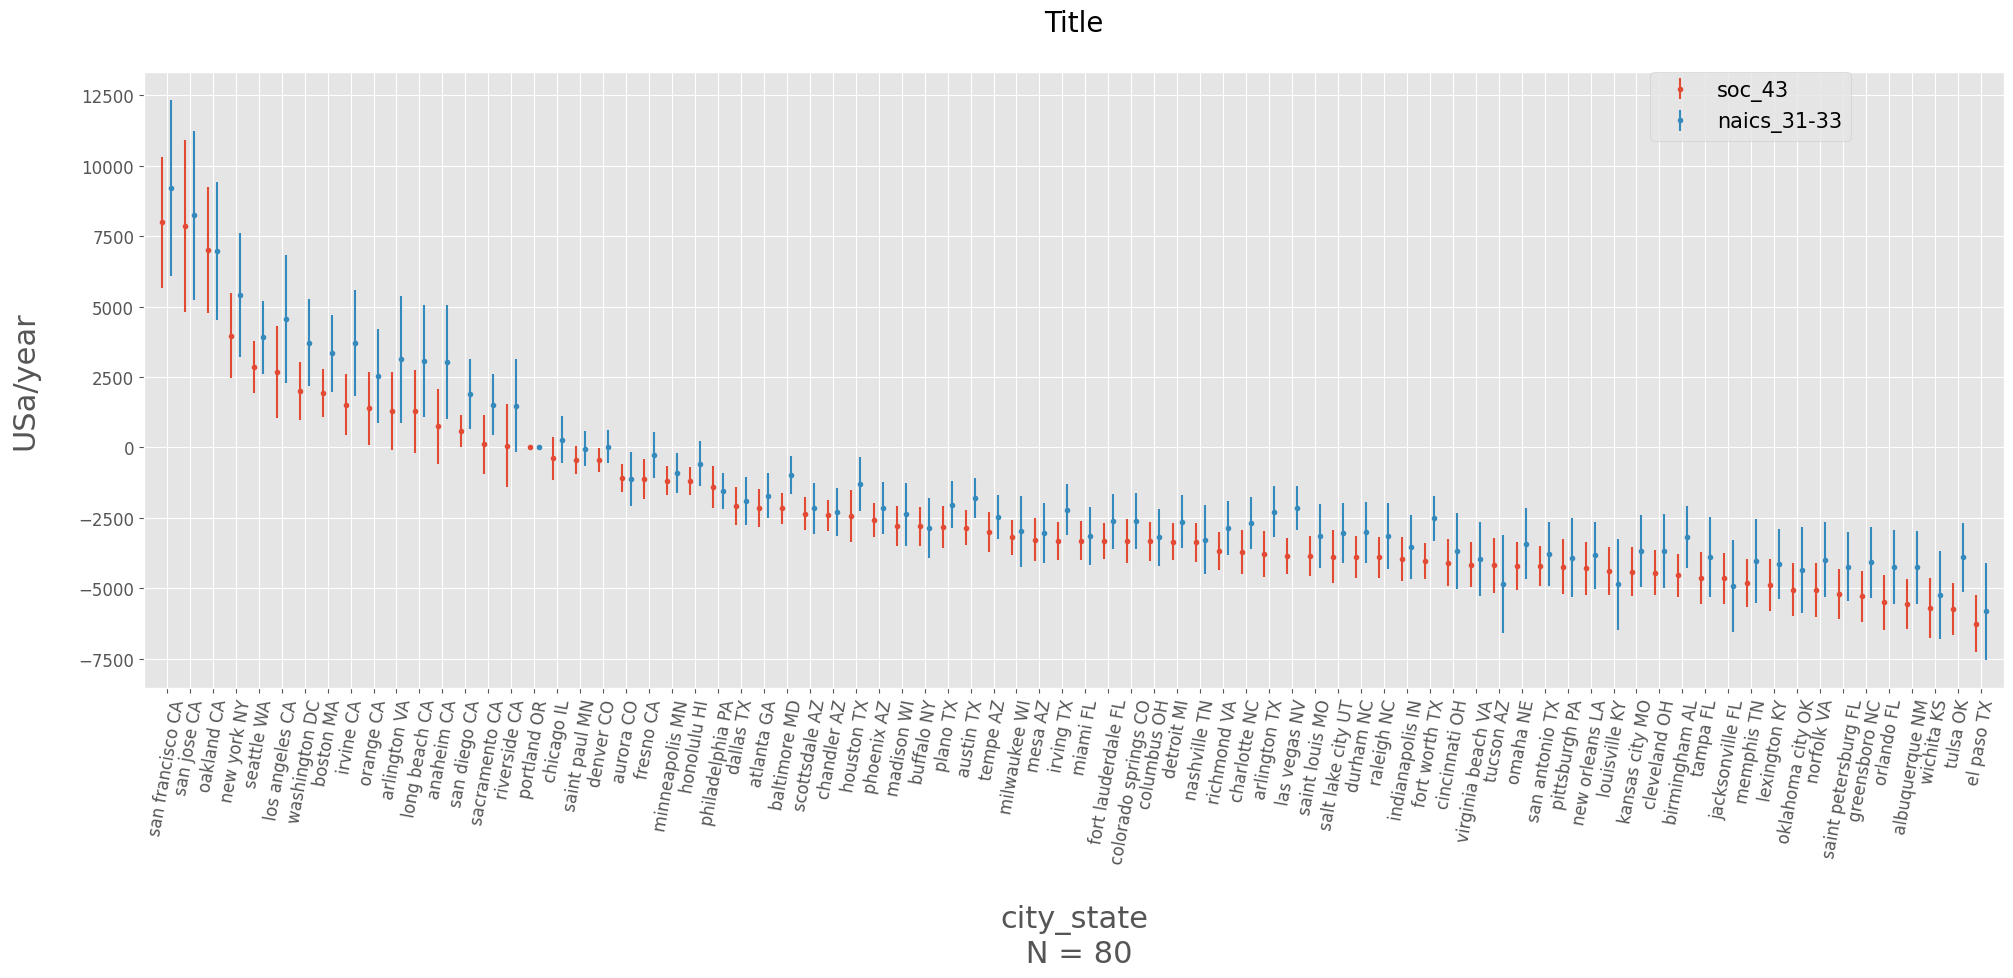

In [26]:
# The two dataframes to be plotted
# We assume they are both the same length
df1 = df.loc[df["id"] == "soc_43"]
df2 = df.loc[df["id"] == "naics_31-33"]

df1 = df1.copy()
df2 = df2.copy()

# this fixes the ordering on the x-axis of the figure
sorter = df1.sort_values('r_mean', ascending=False).digits.values.tolist()

# for each df, we create an additional column and perform a sorting
df1 = df_add(df1, sorter)
df1.sort_values(["srt"], inplace = True)
df2 = df_add(df2, sorter)
df2.sort_values(["srt"], inplace = True)

rcParams['figure.figsize'] = 24, 8

# Here set the x-axis indexes
ind = np.arange(len(df1))

y = df1['r_mean']
e = df1['r_sd']/2                                                    # Legend for df1
plt.errorbar(ind-0.2, y, e, linestyle='None', marker='.', label = 'soc_43')
 
y = df2['r_mean']
e = df2['r_sd']/2                                                   # legend for df2
plt.errorbar(ind+0.2, y, e, linestyle='None', marker='.', label = 'naics_31-33')  

plt.legend(bbox_to_anchor=(0.81, 1), loc=2, fontsize = 15, borderaxespad=0.)

plt.title('''Title
''', fontsize = 20)

# Here we set the city names
plt.xticks(ind, df1["city_state"], rotation='vertical')
plt.xlabel("\n" + "city_state" + "\n N = %i" %len(set(df1["city_state"].values)), fontsize = 22)

plt.grid(True)  
plt.ylabel("USa/year\n", fontsize = 22)
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(labelsize=12)
plt.xticks(rotation=80)
axes = plt.gca()
axes.set_xlim([-1,80])
#axes.set_ylim([-1.3,1.7])
plt.show()
#plt.savefig('foo.png')

## And now three sets

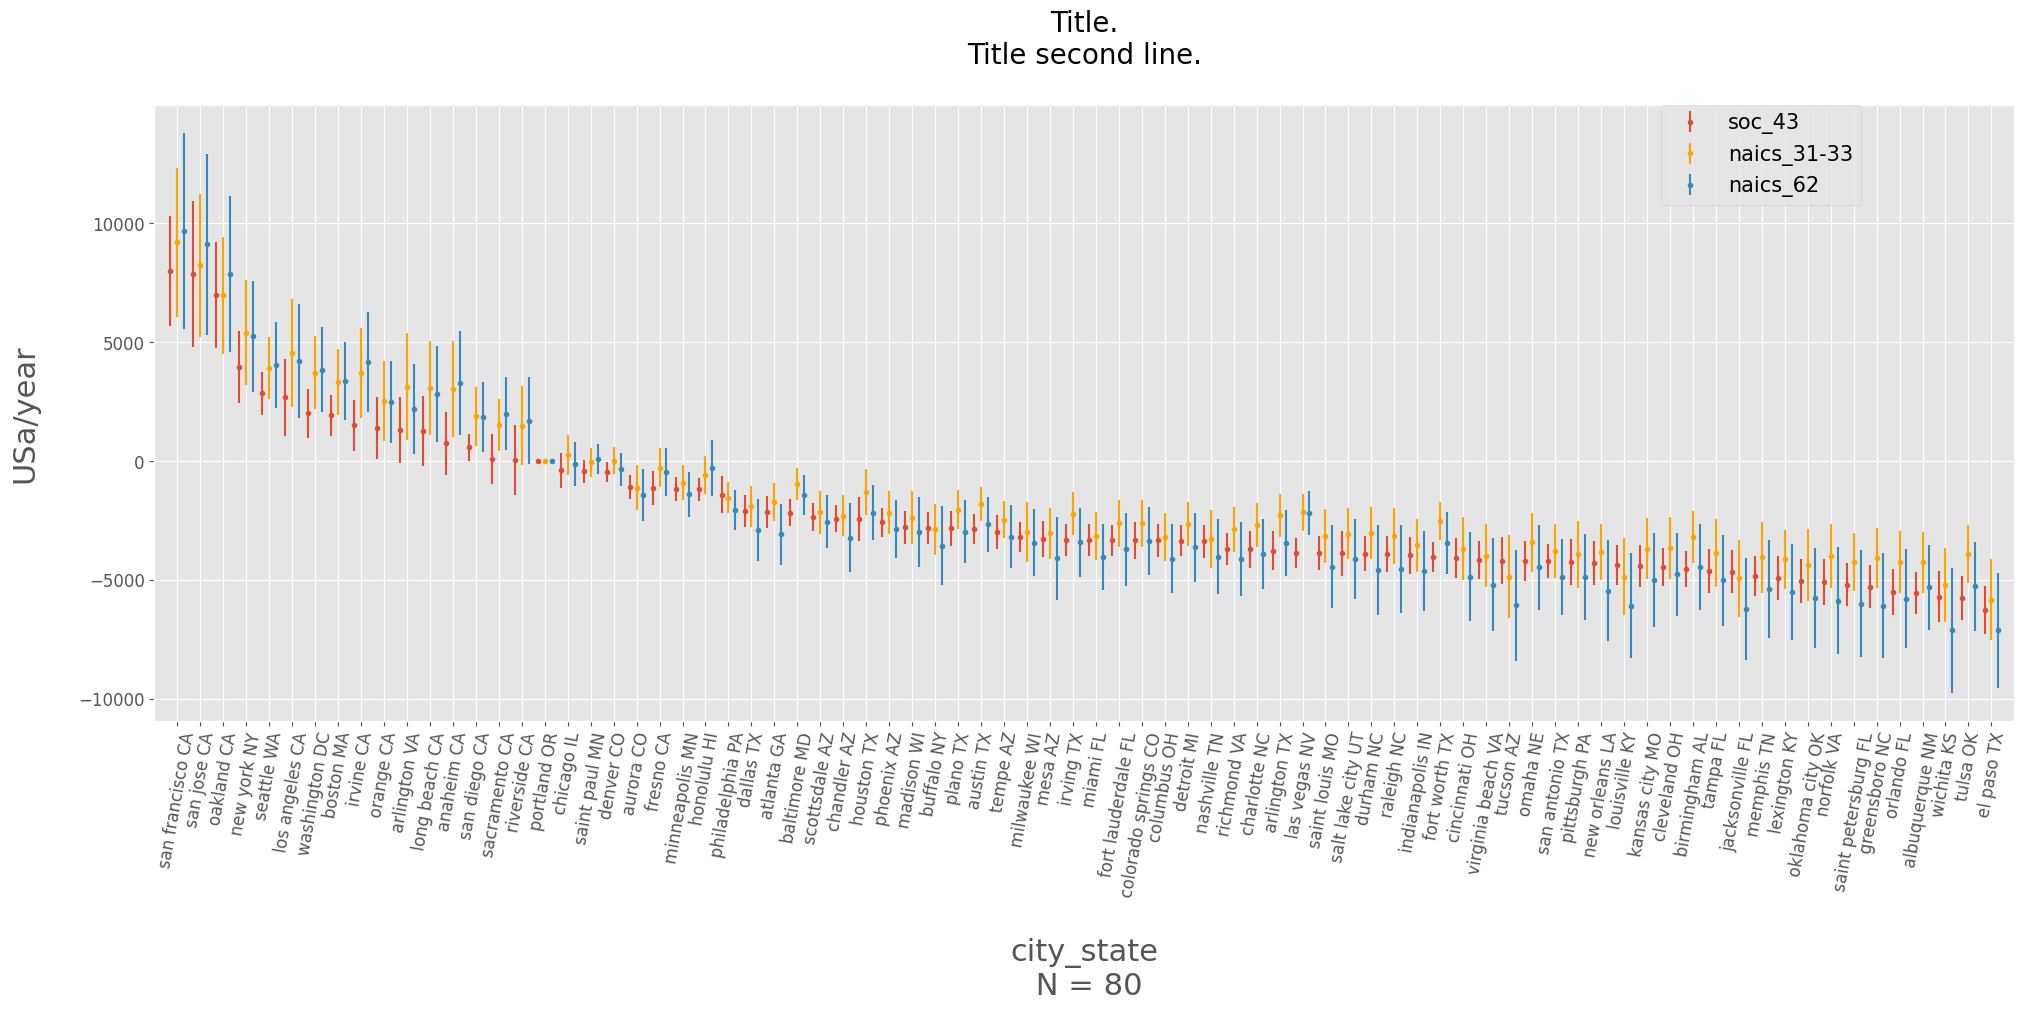

In [35]:
# The three dataframes to be plotted
# We assume they are both the same length
df1 = df.loc[df["id"] == "soc_43"]
df2 = df.loc[df["id"] == "naics_31-33"]
df3 = df.loc[df["id"] == "naics_62"]


df1 = df1.copy()
df2 = df2.copy()
df3 = df3.copy()

# this fixes the ordering on the x-axis of the figure
sorter = df1.sort_values('r_mean', ascending=False).digits.values.tolist()

# for each df, we create an additional column and perform a sorting
df1 = df_add(df1, sorter)
df1.sort_values(["srt"], inplace = True)
df2 = df_add(df2, sorter)
df2.sort_values(["srt"], inplace = True)
df3 = df_add(df3, sorter)
df3.sort_values(["srt"], inplace = True)

rcParams['figure.figsize'] = 24, 8

# Here set the x-axis indexes
ind = np.arange(len(df1))

y = df1['r_mean']
e = df1['r_sd']/2                                                    # Legend for df1
plt.errorbar(ind-0.3, y, e, linestyle='None', marker='.', label = 'soc_43')
 
y = df2['r_mean']
e = df2['r_sd']/2                                                 # legend for df2
plt.errorbar(ind, y, e, linestyle='None', marker='.', label = 'naics_31-33', color = "orange")  

y = df3['r_mean']
e = df3['r_sd']/2                                                 # legend for df3
plt.errorbar(ind+0.3, y, e, linestyle='None', marker='.', label = 'naics_62')  



plt.legend(bbox_to_anchor=(0.81, 1), loc=2, fontsize = 15, borderaxespad=0.)

plt.title('''Title.
Title second line.
''', fontsize = 20)

# Here we set the city names
plt.xticks(ind, df1["city_state"], rotation='vertical')
plt.xlabel("\n" + "city_state" + "\n N = %i" %len(set(df1["city_state"].values)), fontsize = 22)

plt.grid(True)  
plt.ylabel("USa/year\n", fontsize = 22)
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(labelsize=12)
plt.xticks(rotation=80)
axes = plt.gca()
axes.set_xlim([-1,80])
#axes.set_ylim([-1.3,1.7])
plt.show()
#plt.savefig('foo.png')

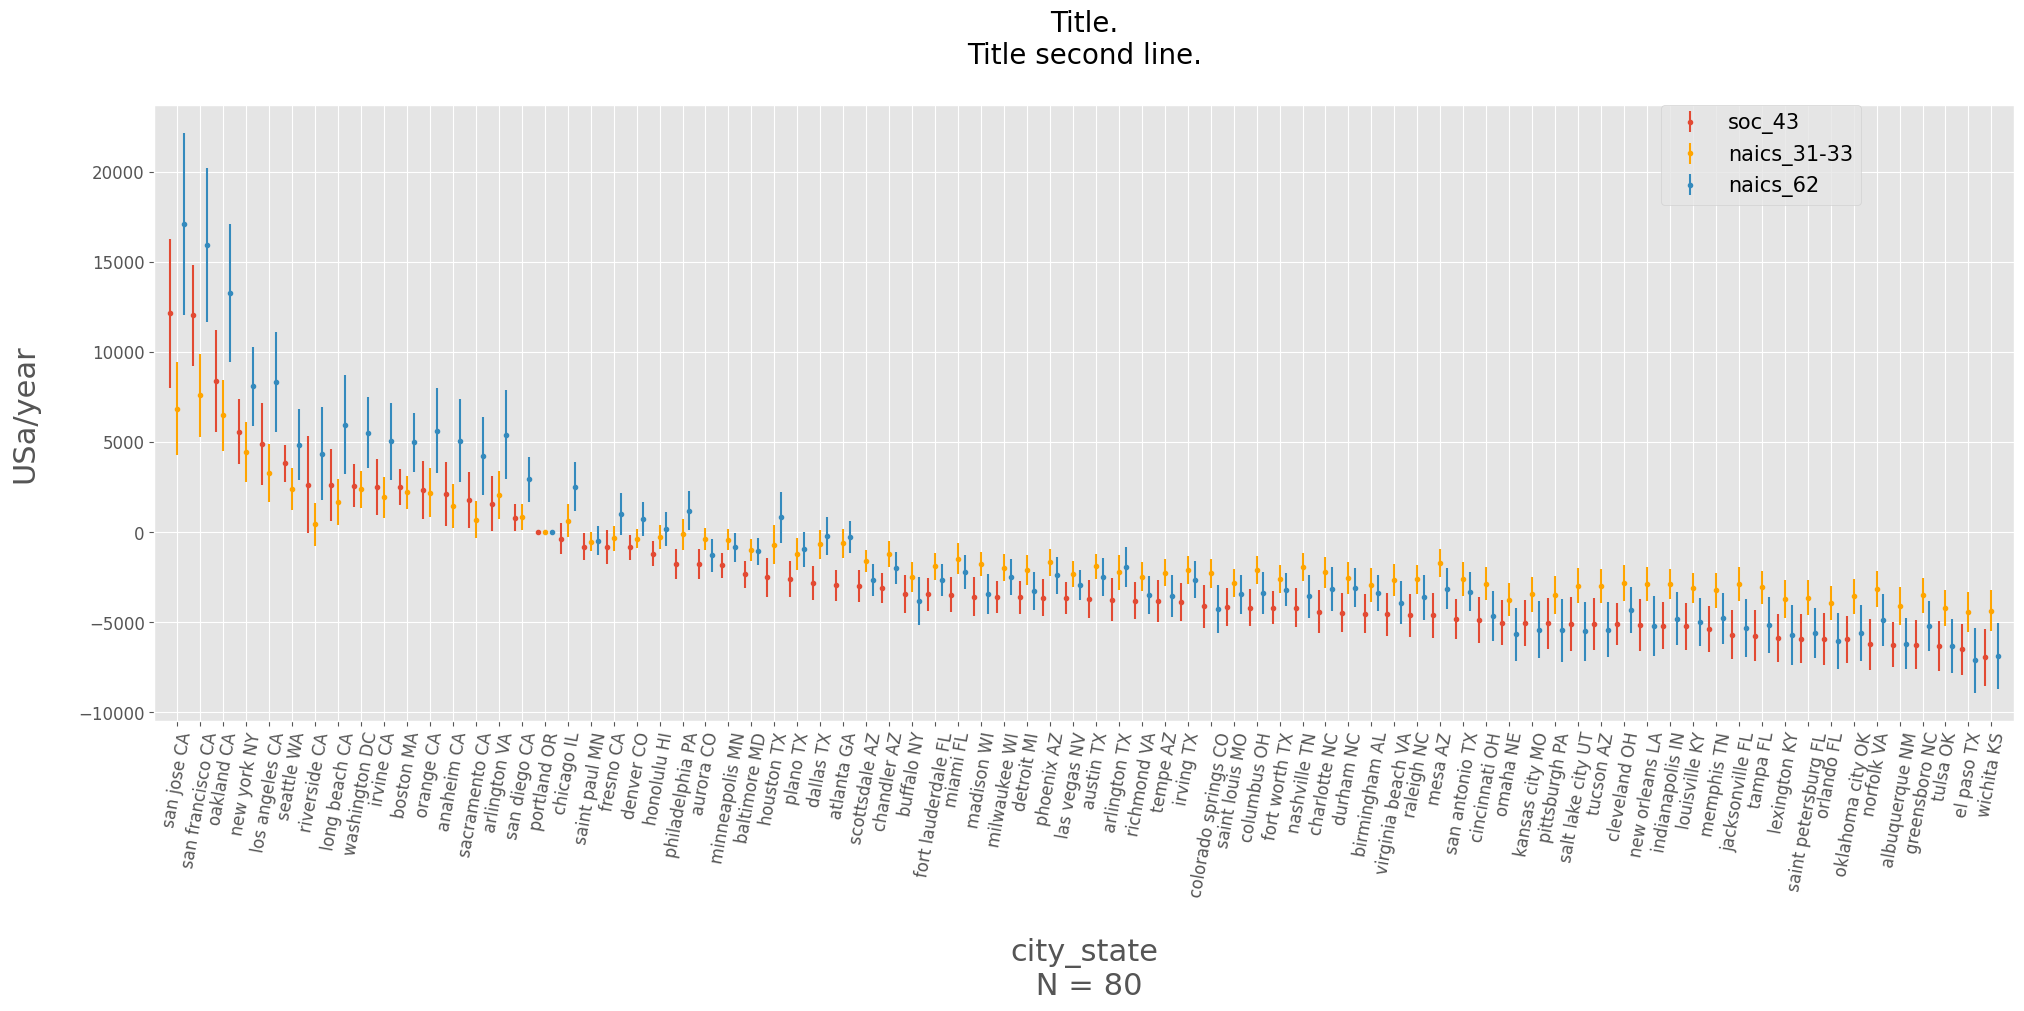

In [9]:
# The three dataframes to be plotted
# We assume they are both the same length
df1 = df.loc[df["id"] == "soc_25"]
df2 = df.loc[df["id"] == "soc_41"]
df3 = df.loc[df["id"] == "soc_11"]


df1 = df1.copy()
df2 = df2.copy()
df3 = df3.copy()

# this fixes the ordering on the x-axis of the figure
sorter = df1.sort_values('r_mean', ascending=False).digits.values.tolist()

# for each df, we create an additional column and perform a sorting
df1 = df_add(df1, sorter)
df1.sort_values(["srt"], inplace = True)
df2 = df_add(df2, sorter)
df2.sort_values(["srt"], inplace = True)
df3 = df_add(df3, sorter)
df3.sort_values(["srt"], inplace = True)

rcParams['figure.figsize'] = 24, 8

# Here set the x-axis indexes
ind = np.arange(len(df1))

y = df1['r_mean']
e = df1['r_sd']/2                                                    # Legend for df1
plt.errorbar(ind-0.3, y, e, linestyle='None', marker='.', label = 'soc_43')
 
y = df2['r_mean']
e = df2['r_sd']/2                                                 # legend for df2
plt.errorbar(ind, y, e, linestyle='None', marker='.', label = 'naics_31-33', color = "orange")  

y = df3['r_mean']
e = df3['r_sd']/2                                                 # legend for df3
plt.errorbar(ind+0.3, y, e, linestyle='None', marker='.', label = 'naics_62')  



plt.legend(bbox_to_anchor=(0.81, 1), loc=2, fontsize = 15, borderaxespad=0.)

plt.title('''Title.
Title second line.
''', fontsize = 20)

# Here we set the city names
plt.xticks(ind, df1["city_state"], rotation='vertical')
plt.xlabel("\n" + "city_state" + "\n N = %i" %len(set(df1["city_state"].values)), fontsize = 22)

plt.grid(True)  
plt.ylabel("USa/year\n", fontsize = 22)
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(labelsize=12)
plt.xticks(rotation=80)
axes = plt.gca()
axes.set_xlim([-1,80])
#axes.set_ylim([-1.3,1.7])
plt.show()
#plt.savefig('foo.png')